<a href="https://colab.research.google.com/github/zwimpee/cursivetransformer/blob/main/zach's_hypothesis_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mechanistic Interpretability Crash Course


The purpose of this notebook is to both outline the most important high-level concepts, as well as dive into the technical details of, the emerging field of mechanistic interpretability. Additionally, this notebook will serve as the gold-standard I will reference moving forward to tie together the insights that can be gained from applying ME techniques, and how these techniques can be applied to our modified transformer architecture.

To this end, we will break things down into the following sections. Note that while I intend for the interested reader to cover them in order, it should not be required, as each section should contain the bulk of what is needed to build upon itself in a self-contained, yet first principled, manner:

1. Transformer Circuits: What are they, and why they are useful?
2. Induction Heads: What are they, how do they form, and how do we detect them?
3. Polysemantic features in the neuron basis
4. Learning the monosemantic features from their polysemantic embeddings via training a hooked SAE on the activations within an attention block
5. How all of this applies to the `cursivetransformer` project

# Chapter 1: Transformer Circuits: What are they, and why are they useful?

For this chapter, I will be using the following 2 papers as references:
1. https://transformer-circuits.pub/2021/framework/index.html
2. https://transformer-circuits.pub/2022/in-context-learning-and-induction-heads/index.html

## Definitions

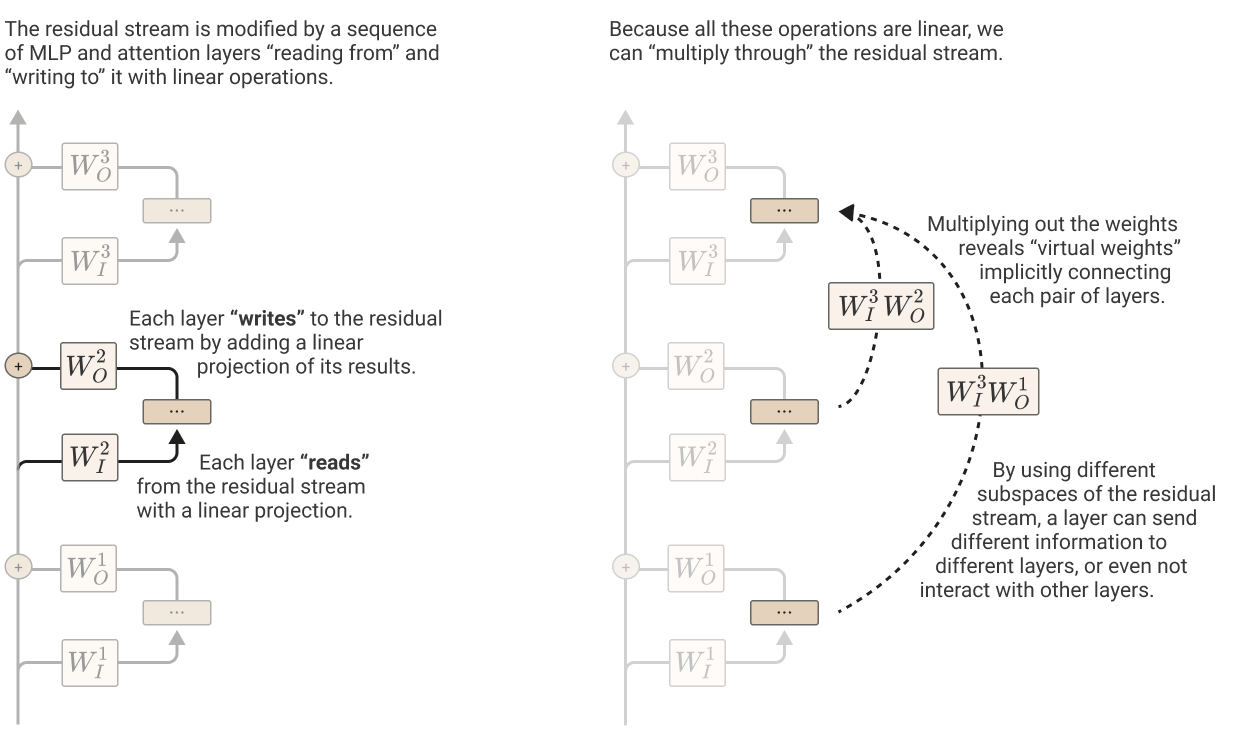

- **Residual Stream**: The residual stream is simply the sum of the output of all the previous layers and the original embedding.
  >We generally think of the residual stream as a communication channel, since it doesn't do any processing itself and all layers communicate through it. The residual stream has a deeply linear structure. Every layer performs an arbitrary linear transformation to "read in" information from the residual stream at the start, 4 and performs another arbitrary linear transformation before adding to "write" its output back into the residual stream. This linear, additive structure of the residual stream has a lot of important implications. One basic consequence is that the residual stream doesn't have a "privileged basis"; we could rotate it by rotating all the matrices interacting with it, without changing model behavior.
- **Transformer Circuits**: Transformer circuits are the computational pathways within transformer models that are responsible for specific behaviors or tasks. They consist of interconnected components—such as attention heads, feedforward networks, and layer norms—that work together to process input data and generate outputs. By analyzing these circuits, researchers can understand how transformers perform complex computations, leading to greater interpretability of the model's internal mechanisms.

  > *Transformer circuits provide a framework for dissecting the model's computations into understandable parts. By mapping out these circuits, we can trace how information flows through the network, how different components interact, and how specific patterns in the input lead to certain outputs. This understanding is crucial for interpreting model behavior, debugging, and enhancing model performance.*

- **Attention Heads**: An attention head is a fundamental component of the transformer's attention mechanism. Each attention head allows the model to focus on different parts of the input sequence when generating each part of the output sequence. It computes attention weights using queries (Q) and keys (K) and applies these weights to values (V) to aggregate relevant information.

  > *In multi-head attention, multiple attention heads operate in parallel, each in its own subspace. This enables the model to capture a variety of relationships and patterns within the data, such as syntactic structures or long-range dependencies. Attention heads can specialize in different roles, and understanding their functions is key to interpreting transformer models.*



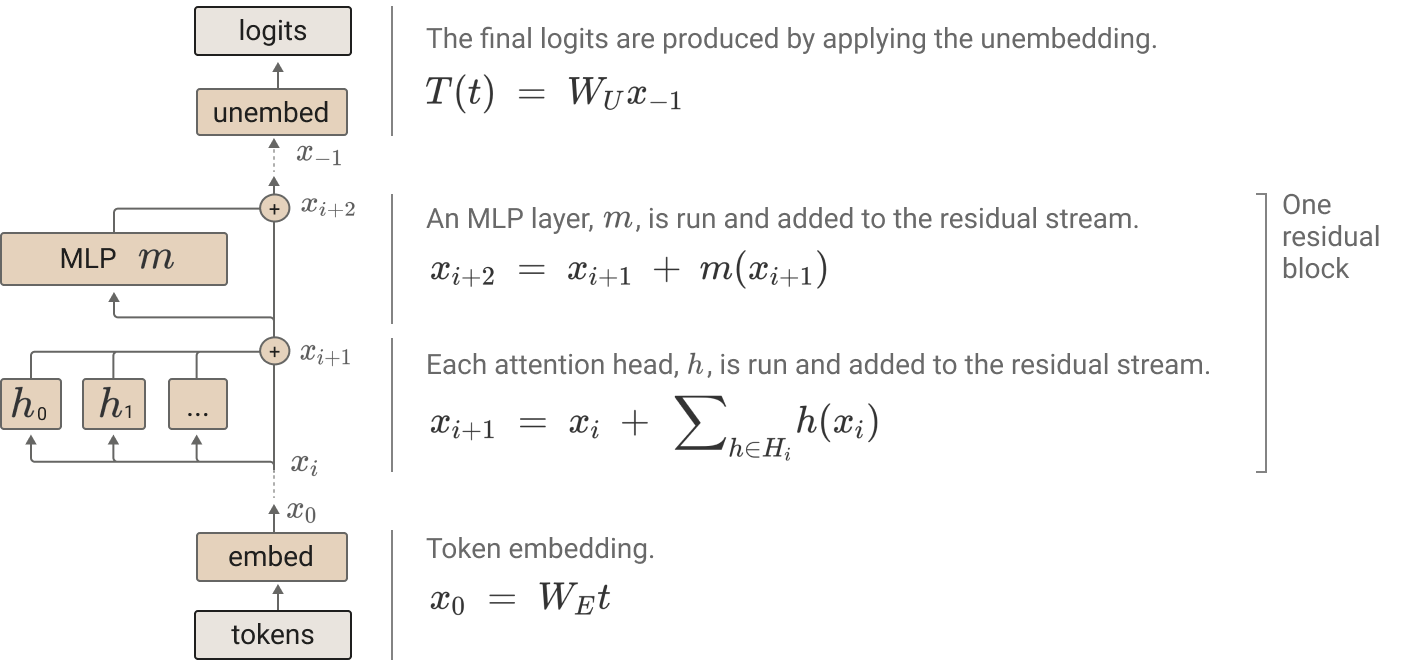


---

## Why Transformer Circuits Are Useful

Understanding transformer circuits is beneficial for several reasons:

1. **Interpretability**: By breaking down the model into circuits, we can gain insights into how specific components contribute to the model's behavior. This helps in understanding what the model has learned and how it processes information.

2. **Debugging and Error Analysis**: Identifying the circuits responsible for certain outputs allows us to pinpoint where errors or unexpected behaviors originate. This is crucial for refining the model and ensuring its reliability.

3. **Model Optimization**: Knowledge of transformer circuits enables us to optimize the model's architecture by enhancing or pruning specific components. This can lead to more efficient models with better performance.

4. **Transfer Learning**: Understanding the functions of different circuits allows for the reuse of certain components in other models or tasks. This modular approach can save time and resources in developing new models.

5. **Advancing Mechanistic Interpretability**: Studying transformer circuits contributes to the broader field of mechanistic interpretability, which aims to understand neural networks at a fundamental level. This can lead to the development of models that are not only powerful but also transparent and trustworthy.

---

By exploring transformer circuits, we delve into the mechanics of how transformers work, moving beyond treating them as black boxes. This deep understanding is essential for advancing artificial intelligence in a responsible and informed manner.


# Chapter 2: Induction Heads: What Are They, How Do They Form, and How Do We Detect Them?

For this chapter, we will delve into the concept of **induction heads** in transformer models. We'll explore what they are, how they emerge during training, and the methods used to detect and analyze them. This discussion is primarily based on the insights from the following paper:

- [In-Context Learning and Induction Heads](https://transformer-circuits.pub/2022/in-context-learning-and-induction-heads/index.html)

## Introduction to Induction Heads

**Induction heads** are specialized attention heads in transformer models that play a crucial role in **in-context learning**. They enable the model to generalize patterns within the input sequence by recognizing and replicating sequences it has seen before.

The central trick to induction heads is that the key is computed from tokens shifted one token back. The query searches for "similar" key vectors, but because keys are shifted, finds the next token.

The following example, from a larger model with more sophisticated induction heads, is a useful illustration:

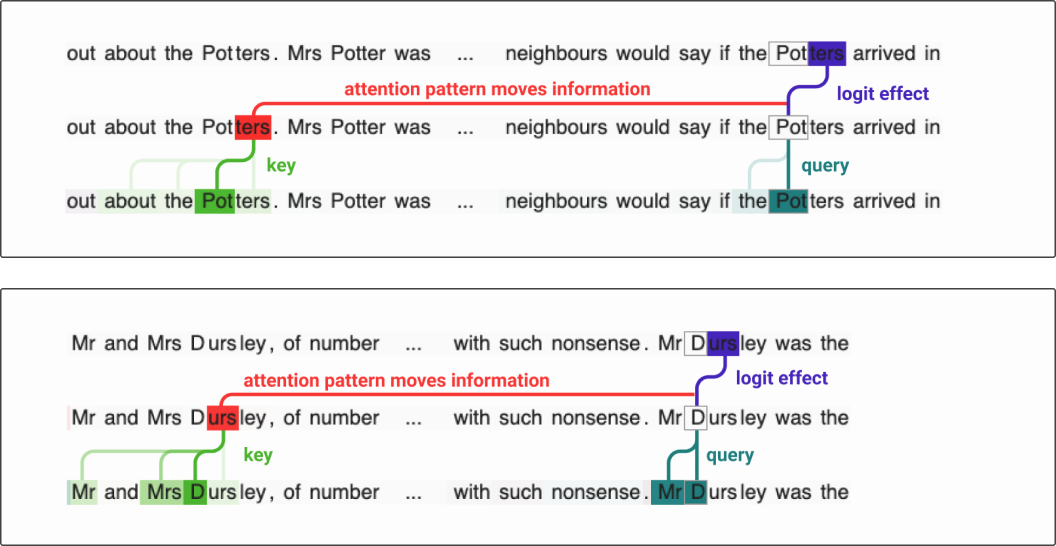

---

# Chapter 3: Polysemantic Features in the Neuron Basis

In this chapter, we'll explore the concept of **polysemantic neurons** in transformer models. We'll discuss what they are, why they arise, and their implications for model interpretability.

## Understanding Polysemantic Neurons

### What Are Polysemantic Neurons?

A **polysemantic neuron** is a neuron that responds to multiple, often unrelated, features or concepts. In other words, the neuron's activation is associated with various patterns in the data, not just a single, easily interpretable feature.

### Contrast with Monosemantic Neurons

- **Monosemantic Neurons**: Neurons that respond to a single feature or concept, making their behavior easily interpretable.

- **Polysemantic Neurons**: Neurons that respond to multiple features, making it challenging to assign a clear interpretation.

### Why Do Polysemantic Neurons Arise?

- **Dimensionality Reduction**: The model compresses high-dimensional input data into lower-dimensional representations, causing neurons to represent multiple features.

- **Parameter Efficiency**: Sharing neurons for multiple features allows the model to use parameters more efficiently.

- **Training Dynamics**: The optimization process during training can lead to overlapping representations.

## Implications of Polysemantic Neurons

### Challenges for Interpretability

- **Ambiguity**: It becomes difficult to attribute a neuron's activation to a specific feature.

- **Complex Interactions**: Multiple features interacting within a neuron complicate the analysis of the model's behavior.

---

# Chapter 4: Learning the Monosemantic Features from Their Polysemantic Embeddings via Training a Hooked Sparse Autoencoder on the Activations Within an Attention Block

In this chapter, we'll discuss a method to extract monosemantic features from polysemantic neuron embeddings by training a **hooked sparse autoencoder (SAE)** on the activations within an attention block.





## Overview of the Approach

### Goal

- **Extract Monosemantic Features**: Decompose polysemantic activations into interpretable, single-feature representations.

### Method

- **Hooked Sparse Autoencoder**: An autoencoder model is "hooked" into the attention block to learn sparse, monosemantic codes from the activations.

## Understanding Sparse Autoencoders

### What Is a Sparse Autoencoder?

- **Autoencoder**: A neural network trained to reconstruct its input, typically consisting of an encoder and a decoder.

- **Sparsity Constraint**: Encourages the encoder to produce activations with many zeros, leading to sparse representations.

### Why Use Sparsity?

- **Feature Separation**: Sparse activations tend to represent distinct features.

- **Interpretability**: Sparse codes are more likely to correspond to monosemantic features.

## Implementing the Hooked SAE

### Integration with the Transformer

- **Hooking Mechanism**: The SAE is connected to the activations within an attention block, intercepting and processing them.

- **Non-Disruptive**: The SAE operates in parallel, not interfering with the transformer's primary computations.

### Training the SAE

- **Objective Function**: Minimize reconstruction error while enforcing sparsity in the encoder's activations.

- **Data Source**: Use the activations from the attention block as input data for the SAE.

### Sparsity Regularization

- **Techniques**:

  - **L1 Regularization**: Penalize the absolute values of activations.
  
  - **KL Divergence**: Encourage the average activation to match a low target value.

- **Balancing Act**: Adjust the sparsity penalty to achieve meaningful representations without degrading reconstruction quality.

## Benefits of the Hooked SAE

### Extraction of Monosemantic Features

- **Decomposition**: The SAE learns to represent the input activations as a combination of sparse, distinct features.

- **Interpretability**: Each neuron in the encoder may correspond to a single, interpretable feature.

### Analysis of Attention Blocks

- **Understanding Mechanisms**: By examining the sparse codes, we can infer what features the attention block is processing.

- **Debugging and Improvement**: Identifying which features are used allows for targeted adjustments to the model.

## Challenges and Considerations

### Selection of Hyperparameters

- **Sparsity Level**: Determining the right amount of sparsity is crucial for meaningful representations.

- **Model Capacity**: The size of the encoder and decoder affects the quality of the learned features.

### Computational Overhead

- **Efficiency**: Hooking an SAE into the transformer increases computational requirements.

- **Optimization**: Efficient training methods and possibly model pruning can mitigate overhead.

### Generalization

- **Transferability**: Ensuring that the learned features generalize across different inputs and tasks.

- **Overfitting**: Avoiding overfitting to the training data used for the SAE.



---

# Chapter 5: How All of This Applies to the `cursivetransformer` Project



In this final chapter, we'll tie together the concepts discussed and explore how they apply to the `cursivetransformer` project. To begin, I will introduce my refined, formal hypothesis statement:

> Within a transformer model trained to generate cursive handwriting, there are several specific components which should be detectable:
1. An [induction circuit](https://colab.research.google.com/drive/1TVHaqN7if-8aCmc06t8CAIaHUlhJ4ek7#scrollTo=XsZy1UBgHUHU) which contains a K-composition for the `theta` token preceding the current `r` token
2. A layer in which we can identify a polysemantic feature which fires for both dotting i's and crossing t's, which we can decompose into monosemantic features in the hidden layer of the SAE